In [4]:
import pandas as pd

# Load the dataset with the correct encoding
file_path = 'C:\\Users\\HIMANSHU\\OneDrive\\Desktop\\pp\\superstore.csv'
superstore_df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the dataset
superstore_df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


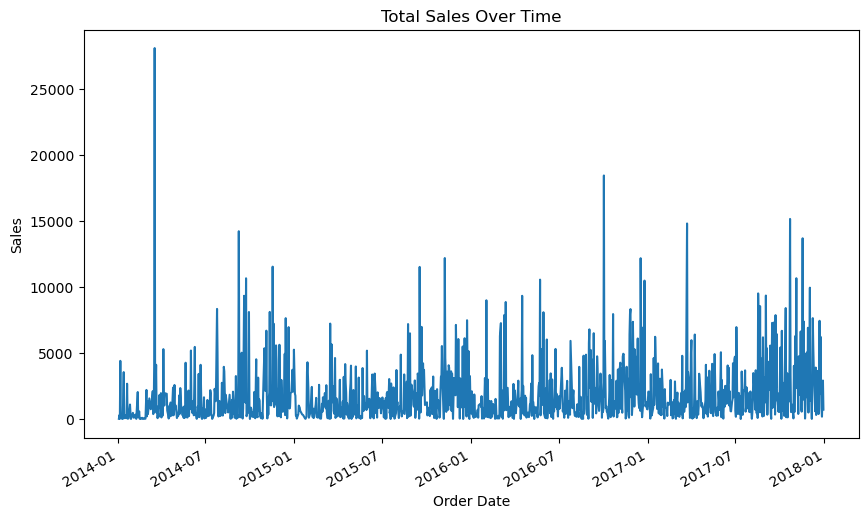

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'superstore.csv'  # Replace with your dataset path
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Convert the 'Order Date' column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by date and sum the sales
sales_over_time = df.groupby('Order Date')['Sales'].sum()

# Plot the total sales over time
plt.figure(figsize=(10, 6))
sales_over_time.plot()
plt.title('Total Sales Over Time')
plt.ylabel('Sales')
plt.xlabel('Order Date')
plt.show()


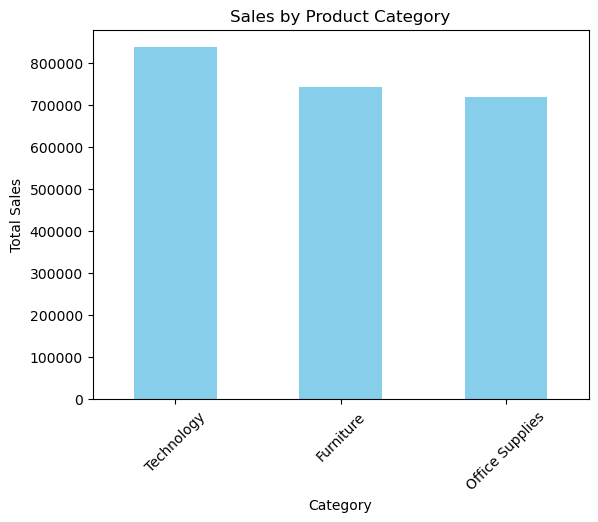

In [6]:
# Group by category and sum the sales
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Plot the categories
category_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Product Category')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()


C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_1292\3253485926.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub_category_profit_margin = df.groupby('Sub-Category').apply(lambda x: (x['Profit'].sum() / x['Sales'].sum()) * 100).sort_values(ascending=False)


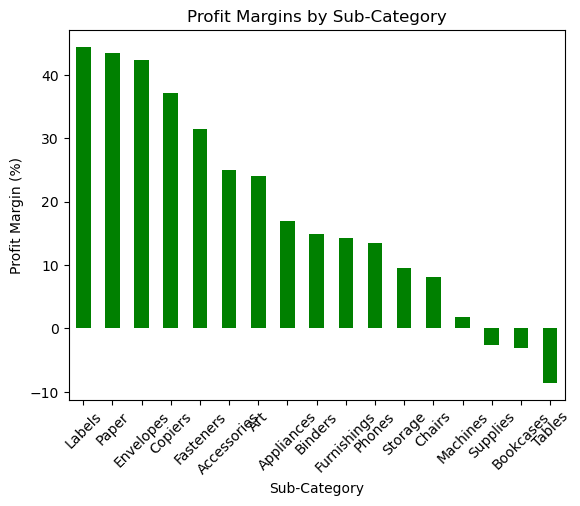

In [7]:
# Calculate profit margin per sub-category
sub_category_profit_margin = df.groupby('Sub-Category').apply(lambda x: (x['Profit'].sum() / x['Sales'].sum()) * 100).sort_values(ascending=False)

# Plot the profit margins by sub-category
sub_category_profit_margin.plot(kind='bar', color='green')
plt.title('Profit Margins by Sub-Category')
plt.ylabel('Profit Margin (%)')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45)
plt.show()


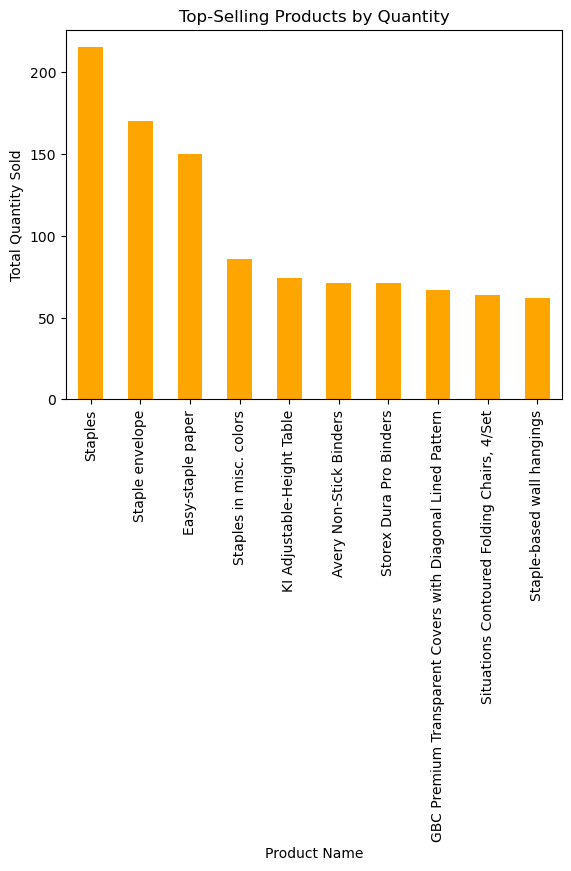

In [8]:
## Top-Selling Products by Quantity
# Group by product name and sum the quantity
top_selling_products = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot the top-selling products
top_selling_products.plot(kind='bar', color='orange')
plt.title('Top-Selling Products by Quantity')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Product Name')
plt.xticks(rotation=90)
plt.show()


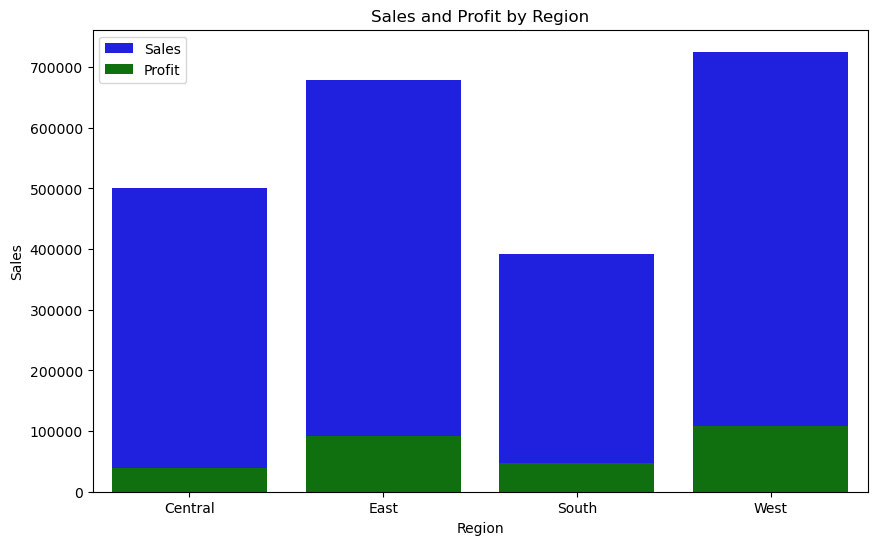

In [9]:
##Sales and Profit by Region
import seaborn as sns

# Group by region for both sales and profit
region_sales_profit = df.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Create a barplot for both sales and profit
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=region_sales_profit, ax=ax, color='blue', label='Sales')
sns.barplot(x='Region', y='Profit', data=region_sales_profit, ax=ax, color='green', label='Profit')

plt.title('Sales and Profit by Region')
plt.legend()
plt.show()


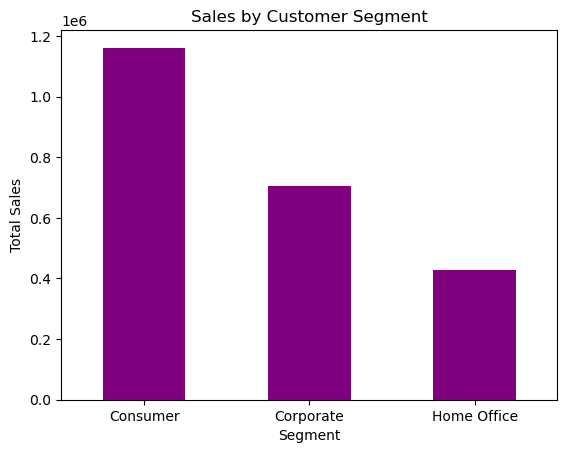

In [10]:
##Customer Segments with Highest Sales
# Group by segment and sum the sales
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)

# Plot the sales by customer segment
segment_sales.plot(kind='bar', color='purple')
plt.title('Sales by Customer Segment')
plt.ylabel('Total Sales')
plt.xlabel('Segment')
plt.xticks(rotation=0)
plt.show()


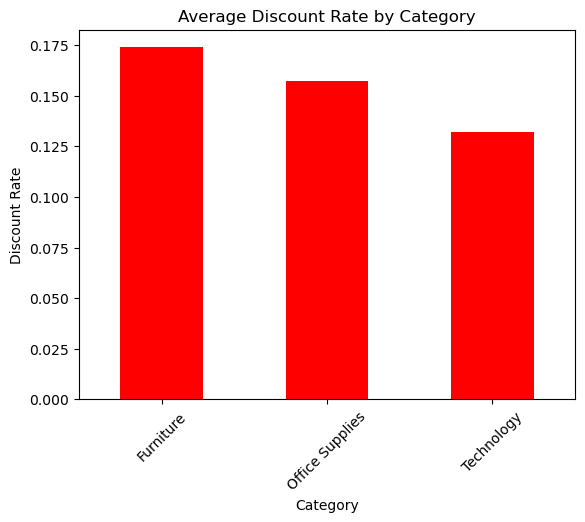

In [11]:
##Discount Rates by Product Category
# Calculate average discount by category
category_discount = df.groupby('Category')['Discount'].mean().sort_values(ascending=False)

# Plot the discount rates
category_discount.plot(kind='bar', color='red')
plt.title('Average Discount Rate by Category')
plt.ylabel('Discount Rate')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()


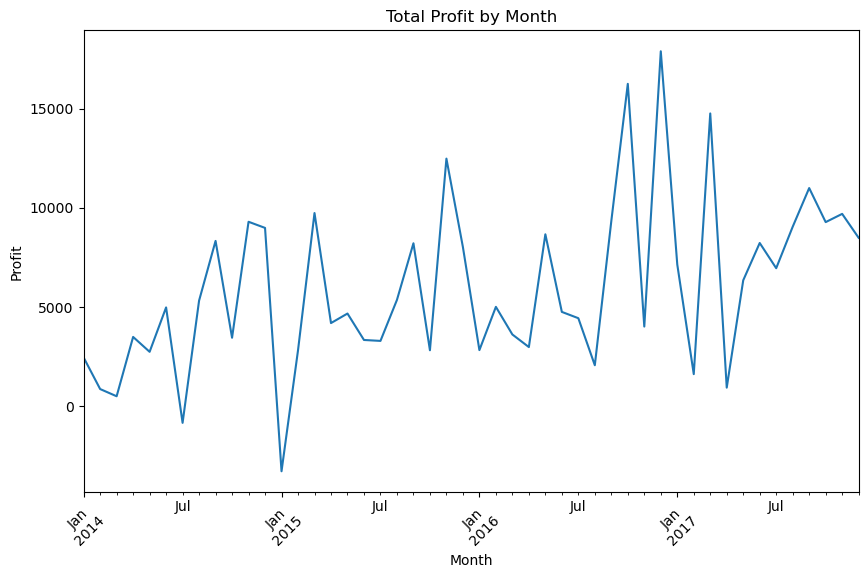

In [12]:
# Extract year and month from 'Order Date'
df['Order Month'] = df['Order Date'].dt.to_period('M')

# Group by month and sum the profit
monthly_profit = df.groupby('Order Month')['Profit'].sum()

# Plot the profit by month
plt.figure(figsize=(10, 6))
monthly_profit.plot()
plt.title('Total Profit by Month')
plt.ylabel('Profit')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()


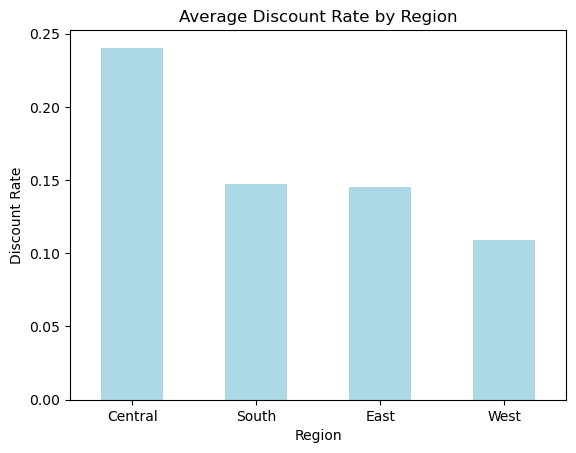

In [13]:
##
# Calculate average discount by region
region_discount = df.groupby('Region')['Discount'].mean().sort_values(ascending=False)

# Plot the discount by region
region_discount.plot(kind='bar', color='lightblue')
plt.title('Average Discount Rate by Region')
plt.ylabel('Discount Rate')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.show()



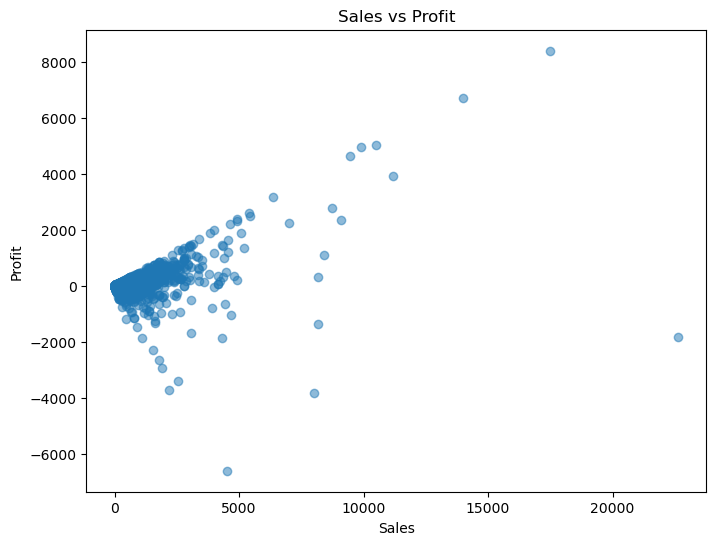

           Sales    Profit
Sales   1.000000  0.479064
Profit  0.479064  1.000000


In [14]:
##What is the correlation between sales and profit?
# Scatter plot to show relationship between Sales and Profit
plt.figure(figsize=(8, 6))
plt.scatter(df['Sales'], df['Profit'], alpha=0.5)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

# Calculate correlation
correlation = df[['Sales', 'Profit']].corr()
print(correlation)


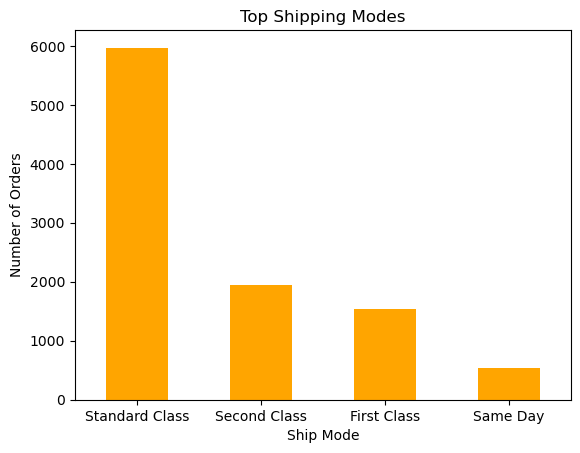

In [18]:
# Count occurrences of each shipping mode
ship_mode_count = df['Ship Mode'].value_counts()

# Plot the shipping modes
ship_mode_count.plot(kind='bar', color='orange')
plt.title('Top Shipping Modes')
plt.ylabel('Number of Orders')
plt.xlabel('Ship Mode')
plt.xticks(rotation=0)
plt.show()


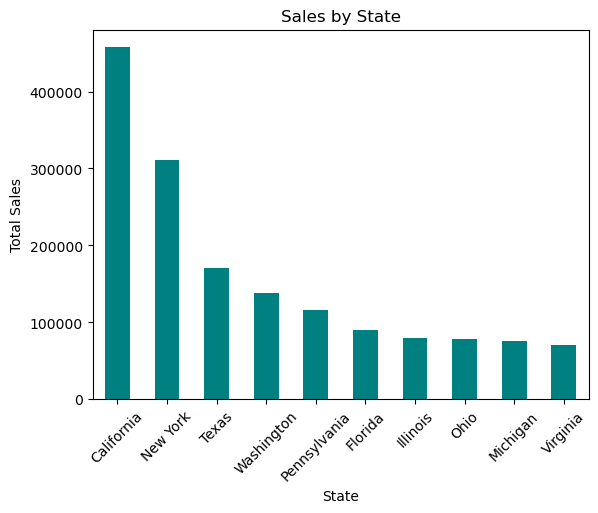

In [19]:
# Group by state and sum the sales
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)

# Plot the sales by state
state_sales.plot(kind='bar', color='teal')
plt.title('Sales by State')
plt.ylabel('Total Sales')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.show()


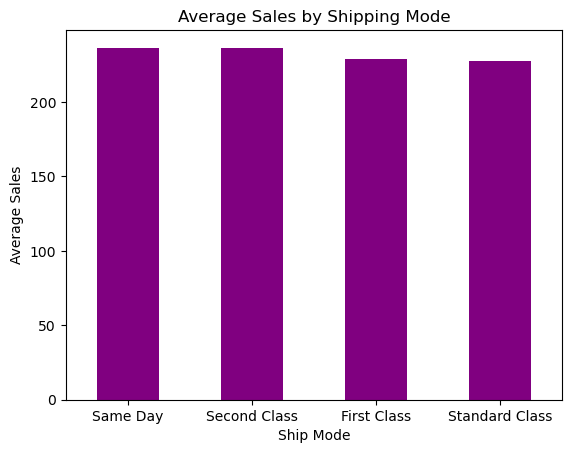

In [20]:
# Calculate average sales by ship mode
avg_sales_ship_mode = df.groupby('Ship Mode')['Sales'].mean().sort_values(ascending=False)

# Plot average sales by ship mode
avg_sales_ship_mode.plot(kind='bar', color='purple')
plt.title('Average Sales by Shipping Mode')
plt.ylabel('Average Sales')
plt.xlabel('Ship Mode')
plt.xticks(rotation=0)
plt.show()


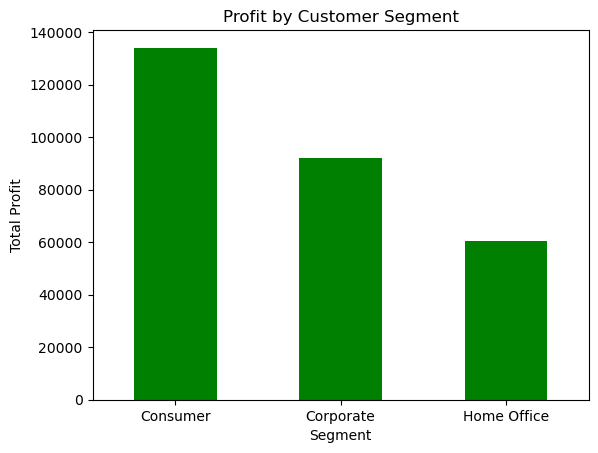

In [21]:
# Group by customer segment and sum the profit
segment_profit = df.groupby('Segment')['Profit'].sum().sort_values(ascending=False)

# Plot the profit by customer segment
segment_profit.plot(kind='bar', color='green')
plt.title('Profit by Customer Segment')
plt.ylabel('Total Profit')
plt.xlabel('Segment')
plt.xticks(rotation=0)
plt.show()


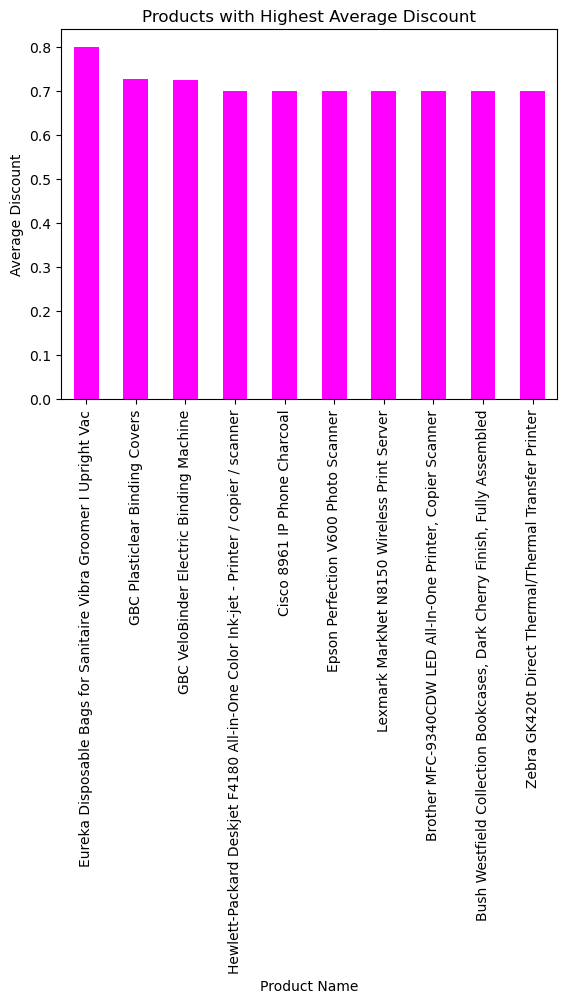

In [22]:
# Calculate average discount by product name
product_discount = df.groupby('Product Name')['Discount'].mean().sort_values(ascending=False).head(10)

# Plot the top discounted products
product_discount.plot(kind='bar', color='magenta')
plt.title('Products with Highest Average Discount')
plt.ylabel('Average Discount')
plt.xlabel('Product Name')
plt.xticks(rotation=90)
plt.show()
